<a href="https://colab.research.google.com/github/DSAlexRS/python/blob/master/MLzoomcamp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge


from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

#Data preparation

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df = df.fillna(0)

In [7]:
df["rooms_per_household"]=df["total_rooms"]/df["households"]
df["bedrooms_per_room"]=df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

In [8]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [9]:
df.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

#EDA mode

In [ ]:
df.describe(include="O")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [ ]:
df.ocean_proximity.value_counts(normalize=True)

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

#spliting data

In [10]:
df_full = df.drop("median_house_value", axis = 1)

In [11]:
df_full.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [12]:
y_full = df["median_house_value"]

In [13]:
X_trainF, X_test, y_trainF, y_test = train_test_split(df_full, y_full, test_size=0.2, random_state=42)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_trainF, y_trainF, test_size=0.25, random_state=42)

In [15]:
len(X_train) + len(X_val) + len(X_test), len(df_full)

(20640, 20640)

In [16]:
len(y_train) + len(y_val) + len(y_test), len(y_full)

(20640, 20640)

In [17]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [18]:
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

#Correlation

In [ ]:
corr = round(X_train.corr(),2)

In [ ]:
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.00,-0.93,-0.10,0.04,0.06,0.09,0.05,-0.02,-0.03,0.10,0.01
latitude,-0.93,1.00,0.00,-0.03,-0.06,-0.10,-0.06,-0.08,0.12,-0.12,-0.00
housing_median_age,-0.10,0.00,1.00,-0.36,-0.32,-0.29,-0.31,-0.12,-0.18,0.13,0.01
total_rooms,0.04,-0.03,-0.36,1.00,0.93,0.85,0.92,0.20,0.17,-0.19,-0.03
total_bedrooms,0.06,-0.06,-0.32,0.93,1.00,0.88,0.98,-0.01,0.01,0.08,-0.03
population,0.09,-0.10,-0.29,0.85,0.88,1.00,0.91,-0.00,-0.08,0.03,0.06
households,0.05,-0.06,-0.31,0.92,0.98,0.91,1.00,0.01,-0.09,0.06,-0.03
median_income,-0.02,-0.08,-0.12,0.20,-0.01,-0.00,0.01,1.00,0.39,-0.62,-0.00
rooms_per_household,-0.03,0.12,-0.18,0.17,0.01,-0.08,-0.09,0.39,1.00,-0.50,0.00
bedrooms_per_room,0.10,-0.12,0.13,-0.19,0.08,0.03,0.06,-0.62,-0.50,1.00,-0.00


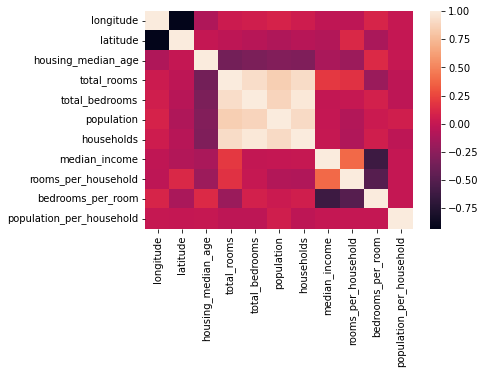

In [ ]:
sns.heatmap(corr)

#mutual information

In [18]:
y_train = y_train < y_train.mean()

y_train = y_train.astype(int)

In [19]:
round(mutual_info_score(X_train.ocean_proximity, y_train),2)

0.1

#one hot encoding - Logistic Regression


In [83]:
columns = list(X_train.columns)

In [21]:
dv = DictVectorizer(sparse=False)

train_dict = X_train[columns].to_dict(orient='records')
X_train1 = dv.fit_transform(train_dict)

val_dict = X_val[columns].to_dict(orient='records')
X_val1 = dv.transform(val_dict)

In [22]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train1, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [24]:
y_pred = model.predict_proba(X_val1)[:, 1]

In [28]:
y_pred

array([0.91958632, 0.82404887, 0.04818131, ..., 0.03824113, 0.14841947,
       0.54690498])

In [26]:
price_house = (y_pred >= 0.5)

In [29]:
price_house

array([ True,  True, False, ..., False, False,  True])

In [34]:
y_val = y_val < y_val.mean()

y_val = y_val.astype(int)

In [91]:
round((y_val == price_house).mean(),6)

0.836483

#feature elimination

In [93]:
def logreg(columns): 
  dv = DictVectorizer(sparse=False)

  train_dict = X_train[columns].to_dict(orient='records')
  X_train1 = dv.fit_transform(train_dict)

  val_dict = X_val[columns].to_dict(orient='records')
  X_val1 = dv.transform(val_dict)

  model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
  model.fit(X_train1, y_train)

  y_pred = model.predict_proba(X_val1)[:, 1]

  price_house = (y_pred >= 0.5)
  return round((y_val == price_house).mean(),6)-0.836483

In [99]:
columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [100]:
for col in columns:
  columns.remove(col)
  print(col)
  print(logreg(columns))
  columns = list(X_train.columns)

longitude
-0.002422999999999953
housing_median_age
-0.006056999999999979
total_rooms
0.0007260000000000044
total_bedrooms
-0.0007269999999999222
population
-0.008963999999999972
households
-0.002422999999999953
median_income
-0.04869199999999996
ocean_proximity
-0.015261999999999998
rooms_per_household
0.0
bedrooms_per_room
0.0
population_per_household
0.0014530000000000376


#Linear regression Ridge

In [21]:
columns = list(X_train.columns)
y_trainlog = np.log1p(y_train)
y_trainlog


array([12.39421473, 13.12236738, 11.06821524, ..., 12.27979233,
       11.84223641, 12.10791391])

In [32]:
y_vallog = np.log1p(y_val)
y_vallog

array([11.47937902, 11.23190118, 12.97363364, ..., 12.74898107,
       12.8682476 , 12.12378283])

In [33]:
def regRidge(a):
  dv = DictVectorizer(sparse=False)

  train_dict = X_train[columns].to_dict(orient='records')
  X_train1 = dv.fit_transform(train_dict)

  val_dict = X_val[columns].to_dict(orient='records')
  X_val1 = dv.transform(val_dict)

  model = Ridge(alpha=a, solver="sag", random_state=42)
  model.fit(X_train1, y_trainlog)

  y_predlog = model.predict(X_val1)

  return mean_squared_error(y_vallog, y_predlog)

In [34]:
alpha = [0, 0.01, 0.1, 1, 10]
for a in alpha:
  print(regRidge(a))

0.2746426261364207
0.2746426261543594
0.274642626324762
0.2746426280377648
0.27464264514086784


57138138586.65307

#Answers

Q1. "<1H OCEAN"

Q2. total_bedrooms and households

Q3. 0.10

Q4. o.84

Q5. total_bedrooms

Q6. 0